## Autoregressive Conditional Heteroskedasticity (ARCH) Model.
These models are specifically used to test volatility of the time series i.e the numeric measure of uncertainty.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.arima_model import ARMA
from scipy.stats.distributions import chi2
from math import sqrt
import seaborn as sns
sns.set()

In [2]:
df = pd.read_csv(r"Downloads\Index2018.csv")
df_copy = df.copy()
df_copy.date = pd.to_datetime(df_copy.date, dayfirst = True)
df_copy.set_index('date', inplace = True)
df_copy = df_copy.asfreq('b')
df_copy = df_copy.fillna(method = 'ffill')
df_copy.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26


In [3]:
df_copy['market_val'] = df_copy.ftse

In [4]:
df_copy = df_copy.drop(['dax', 'ftse', 'nikkei'], axis = 1)
df_copy.head()

,spx,market_val
date,,
1994-01-07,469.90,3445.98
1994-01-10,475.27,3440.58
1994-01-11,474.13,3413.77
1994-01-12,474.17,3372.02
1994-01-13,472.47,3360.01


## LLR Test

In [5]:
def LLR_test(mod_1, mod_2, DF=1):
    L1 = mod_1.fit().llf
    L2 = mod_2.fit().llf
    LR = (2*(L2-L1))
    p = chi2.sf(LR, DF).round(3)
    return p

## Creating Returns

In [6]:
df_copy['returns'] = df_copy.market_val.pct_change(1).mul(100)

## Creating Squared Returns

In [7]:
df_copy['sq_returns'] = df_copy.returns.mul(df_copy.returns)

## Returns Vs Squared Returns

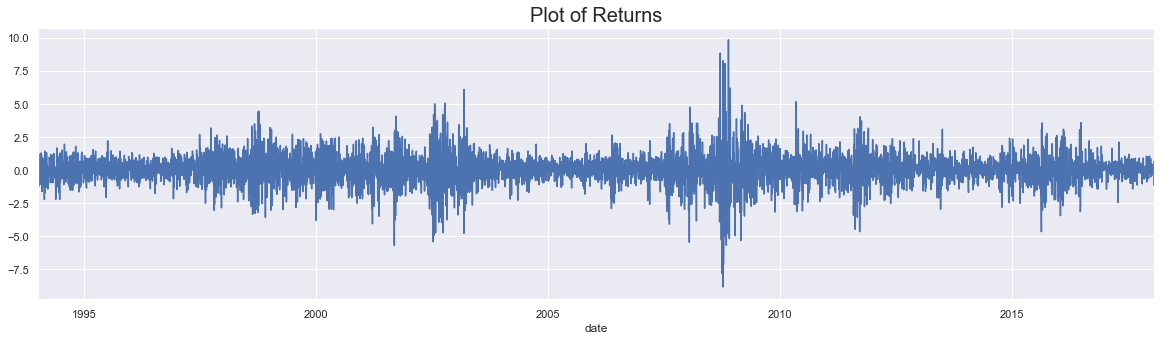

In [8]:
df_copy.returns.plot(figsize = (20,5))
plt.title("Plot of Returns", size = 20)
plt.show()

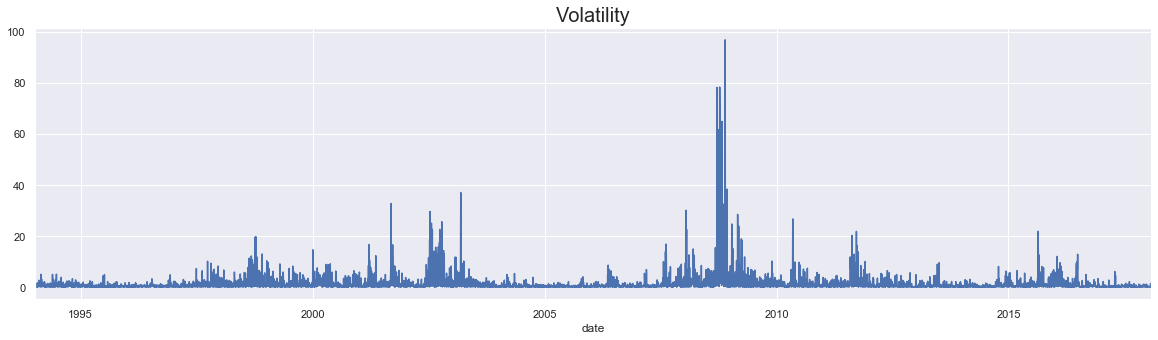

In [9]:
df_copy.sq_returns.plot(figsize = (20,5))
plt.title("Volatility", size = 20)
plt.show()

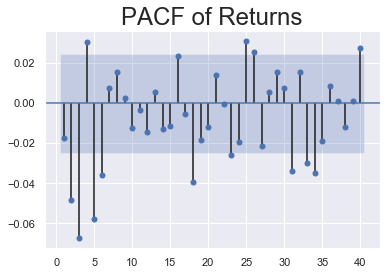

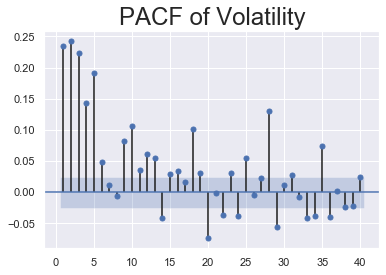

In [10]:
sgt.plot_pacf(df_copy.returns[1:], zero = False, alpha = 0.05, lags = 40, method = 'ols')
plt.title("PACF of Returns", size = 24);
sgt.plot_pacf(df_copy.sq_returns[1:], zero = False, alpha = 0.05, lags = 40, method = 'ols')
plt.title("PACF of Volatility", size = 24);

## arch_model() Method

In [11]:
from arch import arch_model

In [12]:
model_arch_1 = arch_model(df_copy.returns[1:], mean = "Constant", vol = "ARCH", p = 1)
result_arch_1 = model_arch_1.fit(update_freq = 5)
result_arch_1.summary()

Iteration:      5,   Func. Count:     34,   Neg. LLF: 9236.603944308481
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 9236.603925075255
            Iterations: 6
            Function evaluations: 39
            Gradient evaluations: 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                      -0.000
Mean Model:             Constant Mean   Adj. R-squared:                 -0.000
Vol Model:                       ARCH   Log-Likelihood:               -9236.60
Distribution:                  Normal   AIC:                           18479.2
Method:            Maximum Likelihood   BIC:                           18499.4
                                        No. Observations:                 6276
Date:                Sun, Oct 25 2020   Df Residuals:                     6273
Time:                        00:20:33   Df Model:                            3
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0350  1.366e-02      2.564  1.036e-02 [8.244e-03,6.178e-02]
                            Volatility Model                            
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
omega          0.8175  3.463e-02     23.607 3.267e-123 [  0.750,  0.885]
alpha[1]       0.3818  4.570e-02      8.355  6.529e-17 [  0.292,  0.471]
========================================================================

Covariance estimator: robust
"""

In [13]:
model_arch_1 = arch_model(df_copy.returns[1:], mean = "AR", lags = [2,3,6], vol = "ARCH", p = 1, dist = "ged")
result_arch_1 = model_arch_1.fit(update_freq = 5)
result_arch_1.summary()

Iteration:      5,   Func. Count:     56,   Neg. LLF: 8902.311316242787
Iteration:     10,   Func. Count:    110,   Neg. LLF: 8807.782430847921
Iteration:     15,   Func. Count:    158,   Neg. LLF: 8802.51856643729
Iteration:     20,   Func. Count:    205,   Neg. LLF: 8802.51517237489
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 8802.515134560725
            Iterations: 24
            Function evaluations: 244
            Gradient evaluations: 24


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 AR - ARCH Model Results                                  
==========================================================================================
Dep. Variable:                            returns   R-squared:                       0.005
Mean Model:                                    AR   Adj. R-squared:                  0.004
Vol Model:                                   ARCH   Log-Likelihood:               -8802.52
Distribution:      Generalized Error Distribution   AIC:                           17619.0
Method:                        Maximum Likelihood   BIC:                           17666.2
                                                    No. Observations:                 6270
Date:                            Sun, Oct 25 2020   Df Residuals:                     6263
Time:                                    00:20:33   Df Model:                            7
                                  Mean Model                                  
==============================================================================
                 coef    std err          t      P>|t|        95.0% Conf. Int.
------------------------------------------------------------------------------
Const          0.0412  1.463e-02      2.813  4.906e-03   [1.249e-02,6.985e-02]
returns[2]    -0.0343  1.479e-02     -2.319  2.038e-02 [-6.327e-02,-5.313e-03]
returns[3]    -0.0208  8.153e-03     -2.549  1.080e-02 [-3.676e-02,-4.803e-03]
returns[6]    -0.0149  1.483e-02     -1.002      0.316  [-4.392e-02,1.421e-02]
                            Volatility Model                            
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
omega          0.8107  2.971e-02     27.284 6.654e-164 [  0.752,  0.869]
alpha[1]       0.3667  3.551e-02     10.327  5.327e-25 [  0.297,  0.436]
                              Distribution                              
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
nu             1.0537  2.808e-02     37.533 2.699e-308 [  0.999,  1.109]
========================================================================

Covariance estimator: robust
"""

In [14]:
model_arch_1 = arch_model(df_copy.returns[1:], mean = "AR", lags = [2,3,6], vol = "ARCH", p = 1, dist = "t")
result_arch_1 = model_arch_1.fit(update_freq = 5)
result_arch_1.summary()

Iteration:      5,   Func. Count:     58,   Neg. LLF: 8842.004440314315
Iteration:     10,   Func. Count:    111,   Neg. LLF: 8824.493458554454
Iteration:     15,   Func. Count:    159,   Neg. LLF: 8820.169866504006
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 8820.169662261087
            Iterations: 17
            Function evaluations: 177
            Gradient evaluations: 17


<class 'statsmodels.iolib.summary.Summary'>
"""
                              AR - ARCH Model Results                               
====================================================================================
Dep. Variable:                      returns   R-squared:                       0.004
Mean Model:                              AR   Adj. R-squared:                  0.004
Vol Model:                             ARCH   Log-Likelihood:               -8820.17
Distribution:      Standardized Student's t   AIC:                           17654.3
Method:                  Maximum Likelihood   BIC:                           17701.5
                                              No. Observations:                 6270
Date:                      Sun, Oct 25 2020   Df Residuals:                     6263
Time:                              00:20:33   Df Model:                            7
                                  Mean Model                                  
==============================================================================
                 coef    std err          t      P>|t|        95.0% Conf. Int.
------------------------------------------------------------------------------
Const          0.0530  1.105e-02      4.797  1.611e-06   [3.134e-02,7.463e-02]
returns[2]    -0.0344  1.610e-02     -2.136  3.266e-02 [-6.595e-02,-2.838e-03]
returns[3]    -0.0191  1.656e-02     -1.156      0.248  [-5.160e-02,1.332e-02]
returns[6]    -0.0259  1.640e-02     -1.577      0.115  [-5.799e-02,6.282e-03]
                            Volatility Model                            
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
omega          0.8943  4.163e-02     21.483 2.247e-102 [  0.813,  0.976]
alpha[1]       0.3930  3.938e-02      9.979  1.881e-23 [  0.316,  0.470]
                              Distribution                              
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
nu             3.7070      0.183     20.203  9.201e-91 [  3.347,  4.067]
========================================================================

Covariance estimator: robust
"""

## Higher Lag ARCH models

In [15]:
model_arch_2 = arch_model(df_copy.returns[1:], mean = "Constant", vol = "ARCH", p = 2)
result_arch_2 = model_arch_2.fit(update_freq = 5)
result_arch_2.summary()

Iteration:      5,   Func. Count:     42,   Neg. LLF: 8984.12452703821
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 8984.12196248844
            Iterations: 7
            Function evaluations: 54
            Gradient evaluations: 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                      -0.000
Mean Model:             Constant Mean   Adj. R-squared:                 -0.000
Vol Model:                       ARCH   Log-Likelihood:               -8984.12
Distribution:                  Normal   AIC:                           17976.2
Method:            Maximum Likelihood   BIC:                           18003.2
                                        No. Observations:                 6276
Date:                Sun, Oct 25 2020   Df Residuals:                     6272
Time:                        00:20:33   Df Model:                            4
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0422  1.185e-02      3.565  3.638e-04 [1.902e-02,6.546e-02]
                            Volatility Model                            
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
omega          0.6239  2.918e-02     21.377 2.193e-101 [  0.567,  0.681]
alpha[1]       0.2368  3.218e-02      7.358  1.865e-13 [  0.174,  0.300]
alpha[2]       0.2693  3.206e-02      8.401  4.426e-17 [  0.207,  0.332]
========================================================================

Covariance estimator: robust
"""

In [16]:
model_arch_3 = arch_model(df_copy.returns[1:], mean = "Constant", vol = "ARCH", p = 3)
result_arch_3 = model_arch_3.fit(update_freq = 5)
result_arch_3.summary()

Iteration:      5,   Func. Count:     46,   Neg. LLF: 8766.207530515165
Iteration:     10,   Func. Count:     85,   Neg. LLF: 8764.836367249363
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 8764.83636724947
            Iterations: 10
            Function evaluations: 85
            Gradient evaluations: 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                      -0.001
Mean Model:             Constant Mean   Adj. R-squared:                 -0.001
Vol Model:                       ARCH   Log-Likelihood:               -8764.84
Distribution:                  Normal   AIC:                           17539.7
Method:            Maximum Likelihood   BIC:                           17573.4
                                        No. Observations:                 6276
Date:                Sun, Oct 25 2020   Df Residuals:                     6271
Time:                        00:20:33   Df Model:                            5
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0475  1.123e-02      4.228  2.356e-05 [2.548e-02,6.951e-02]
                            Volatility Model                            
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
omega          0.4532  2.280e-02     19.882  5.822e-88 [  0.409,  0.498]
alpha[1]       0.1665  2.427e-02      6.859  6.947e-12 [  0.119,  0.214]
alpha[2]       0.2074  2.257e-02      9.190  3.944e-20 [  0.163,  0.252]
alpha[3]       0.2792  2.978e-02      9.374  6.992e-21 [  0.221,  0.338]
========================================================================

Covariance estimator: robust
"""

We can see ARCH(2) has out-performed ARCH(1) as we can see significant decrease in AIC and and significant increase in Loglikelihood.

## Generalised Autoregressive Conditional Heteroskedasticity (GARCH) Model

In [17]:
model_garch_1 = arch_model(df_copy.returns[1:], mean = "Constant", vol = "GARCH", p = 1, q = 1)
result_garch_1 = model_garch_1.fit(update_freq = 5)
result_garch_1.summary()

Iteration:      5,   Func. Count:     39,   Neg. LLF: 8413.246291629639
Iteration:     10,   Func. Count:     73,   Neg. LLF: 8410.647245466369
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 8410.646871498593
            Iterations: 12
            Function evaluations: 85
            Gradient evaluations: 12


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                      -0.000
Mean Model:             Constant Mean   Adj. R-squared:                 -0.000
Vol Model:                      GARCH   Log-Likelihood:               -8410.65
Distribution:                  Normal   AIC:                           16829.3
Method:            Maximum Likelihood   BIC:                           16856.3
                                        No. Observations:                 6276
Date:                Sun, Oct 25 2020   Df Residuals:                     6272
Time:                        00:20:34   Df Model:                            4
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0422  1.030e-02      4.103  4.081e-05 [2.206e-02,6.243e-02]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega          0.0124  3.264e-03      3.810  1.391e-04 [6.037e-03,1.883e-02]
alpha[1]       0.0880  1.135e-02      7.749  9.242e-15   [6.571e-02,  0.110]
beta[1]        0.9018  1.279e-02     70.518      0.000     [  0.877,  0.927]
============================================================================

Covariance estimator: robust
"""

Including past values as a form of baselines provides much greater accuracy. Also higher likelihood is explained.

## Higher Order GARCH Model

No higher order GARCH Model out-performs the GARCH(1,1) when it comes to variance of market vales.

In [18]:
model_garch_12 = arch_model(df_copy.returns[1:], mean = "Constant", vol = "Garch", p = 1, q = 2)
results_garch_12 = model_garch_12.fit(update_freq = 5)
results_garch_12.summary()

Iteration:      5,   Func. Count:     44,   Neg. LLF: 8419.089867723576
Iteration:     10,   Func. Count:     82,   Neg. LLF: 8410.662161736645
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 8410.64687142376
            Iterations: 14
            Function evaluations: 110
            Gradient evaluations: 14


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                      -0.000
Mean Model:             Constant Mean   Adj. R-squared:                 -0.000
Vol Model:                      GARCH   Log-Likelihood:               -8410.65
Distribution:                  Normal   AIC:                           16831.3
Method:            Maximum Likelihood   BIC:                           16865.0
                                        No. Observations:                 6276
Date:                Sun, Oct 25 2020   Df Residuals:                     6271
Time:                        00:20:34   Df Model:                            5
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0422  1.029e-02      4.107  4.012e-05 [2.209e-02,6.241e-02]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega          0.0124  3.126e-03      3.977  6.966e-05 [6.307e-03,1.856e-02]
alpha[1]       0.0880  1.353e-02      6.499  8.109e-11   [6.142e-02,  0.114]
beta[1]        0.9018      0.202      4.459  8.222e-06     [  0.505,  1.298]
beta[2]        0.0000      0.193      0.000      1.000     [ -0.378,  0.378]
============================================================================

Covariance estimator: robust
"""

Beta(2) coefficient have pval = 1, which indicates the problem of multicollinearity in the model.

In [19]:
model_garch_13 = arch_model(df_copy.returns[1:], mean = "Constant", vol = "GARCH", p = 1, q = 3)
result_garch_13 = model_garch_13.fit(update_freq = 5)
result_garch_13.summary()

Iteration:      5,   Func. Count:     51,   Neg. LLF: 8432.226955854796
Iteration:     10,   Func. Count:     95,   Neg. LLF: 8412.853331605045
Iteration:     15,   Func. Count:    136,   Neg. LLF: 8410.64687447299
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 8410.646871434186
            Iterations: 16
            Function evaluations: 144
            Gradient evaluations: 16


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                      -0.000
Mean Model:             Constant Mean   Adj. R-squared:                 -0.000
Vol Model:                      GARCH   Log-Likelihood:               -8410.65
Distribution:                  Normal   AIC:                           16833.3
Method:            Maximum Likelihood   BIC:                           16873.8
                                        No. Observations:                 6276
Date:                Sun, Oct 25 2020   Df Residuals:                     6270
Time:                        00:20:34   Df Model:                            6
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0422  1.393e-02      3.033  2.420e-03 [1.495e-02,6.955e-02]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega          0.0124  3.011e-02      0.413      0.680 [-4.658e-02,7.145e-02]
alpha[1]       0.0880      0.220      0.399      0.690      [ -0.344,  0.520]
beta[1]        0.9018      6.550      0.138      0.890      [-11.936, 13.740]
beta[2]    8.1246e-10     10.019  8.109e-11      1.000      [-19.637, 19.637]
beta[3]    7.2700e-11      3.713  1.958e-11      1.000      [ -7.277,  7.277]
=============================================================================

Covariance estimator: robust
"""

Beta(2) and Beta(3) coefficients have pval = 1, which indicates the problem of multicollinearity in the model.

In [20]:
model_garch_21 = arch_model(df_copy.returns[1:], mean = "Constant", vol = "GARCH", p = 2, q = 1)
result_garch_21 = model_garch_21.fit(update_freq = 5)
result_garch_21.summary()

Iteration:      5,   Func. Count:     44,   Neg. LLF: 8415.222690467312
Iteration:     10,   Func. Count:     84,   Neg. LLF: 8409.731125920971
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 8409.729351153035
            Iterations: 14
            Function evaluations: 114
            Gradient evaluations: 14


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                      -0.000
Mean Model:             Constant Mean   Adj. R-squared:                 -0.000
Vol Model:                      GARCH   Log-Likelihood:               -8409.73
Distribution:                  Normal   AIC:                           16829.5
Method:            Maximum Likelihood   BIC:                           16863.2
                                        No. Observations:                 6276
Date:                Sun, Oct 25 2020   Df Residuals:                     6271
Time:                        00:20:34   Df Model:                            5
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0420  1.033e-02      4.066  4.791e-05 [2.176e-02,6.227e-02]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega          0.0140  4.423e-03      3.163  1.559e-03  [5.323e-03,2.266e-02]
alpha[1]       0.0718  1.713e-02      4.193  2.757e-05    [3.825e-02,  0.105]
alpha[2]       0.0231  2.427e-02      0.953      0.341 [-2.445e-02,7.069e-02]
beta[1]        0.8935  1.882e-02     47.470      0.000      [  0.857,  0.930]
=============================================================================

Covariance estimator: robust
"""

Here we can see Alpha(2) coefficient has pval = 0.341> 0.05 thus Alpha(2) is insignificant.

In [21]:
model_garch_31 = arch_model(df_copy.returns[1:], mean = "Constant", vol = "GARCH", p = 3, q = 1)
result_garch_31 = model_garch_31.fit(update_freq = 5)
result_garch_31.summary()

Iteration:      5,   Func. Count:     49,   Neg. LLF: 8416.165967954128
Iteration:     10,   Func. Count:     93,   Neg. LLF: 8409.83582154414
Iteration:     15,   Func. Count:    133,   Neg. LLF: 8409.729351297614
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 8409.729351298574
            Iterations: 15
            Function evaluations: 133
            Gradient evaluations: 15


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                      -0.000
Mean Model:             Constant Mean   Adj. R-squared:                 -0.000
Vol Model:                      GARCH   Log-Likelihood:               -8409.73
Distribution:                  Normal   AIC:                           16831.5
Method:            Maximum Likelihood   BIC:                           16871.9
                                        No. Observations:                 6276
Date:                Sun, Oct 25 2020   Df Residuals:                     6270
Time:                        00:20:34   Df Model:                            6
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0420  1.037e-02      4.051  5.101e-05 [2.169e-02,6.235e-02]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega          0.0140  5.541e-03      2.525  1.157e-02  [3.130e-03,2.485e-02]
alpha[1]       0.0718  1.713e-02      4.194  2.745e-05    [3.826e-02,  0.105]
alpha[2]       0.0231  2.448e-02      0.944      0.345 [-2.487e-02,7.110e-02]
alpha[3]       0.0000  2.575e-02      0.000      1.000 [-5.047e-02,5.047e-02]
beta[1]        0.8935  2.601e-02     34.356 1.142e-258      [  0.843,  0.944]
=============================================================================

Covariance estimator: robust
"""

Here we can see Alpha(2) coefficient has pval = 0.345> 0.05 thus Alpha(2) is insignificant. Similar is the case with alpha(3). Thus from GARCH(1,2); GARCH(2,1); GARCH(1,3) and GARCH(3,1) we can conclude that GARCH(1,1) is the best model to measure the volatility of returns. 